Эмоция — это относительно краткий эпизод реакции на некоторое значимое событие. Методы автоматического распознавания человеческих эмоций ставят целью определить, какая конкретно эмоция выражена в тексте, и присвоить ему соответствующую метку эмоционального класса.

Может применяться в различных областях:
- в образовании для определения эмоциональной реакции учащегося (смущение, увлеченность, уверенность),
- в бизнесе для определения степени удовлетворенности клиента (радость, злость, удивление),
- в медицине для диагностики депрессии или суицидальных намерений (апатия, грусть, страх).

## Распознавание эмоций в тексте

Распознавание эмоций ≠ анализ тональности. Анализ тональности — выявление оценки авторов по отношению к объектам, речь о которых идёт в тексте. Она может быть позитивной, негативной или нейтральной. Эмоции могут включать не только радость или грусть, но ужас, гнев, удивление, отвращение и т.п.

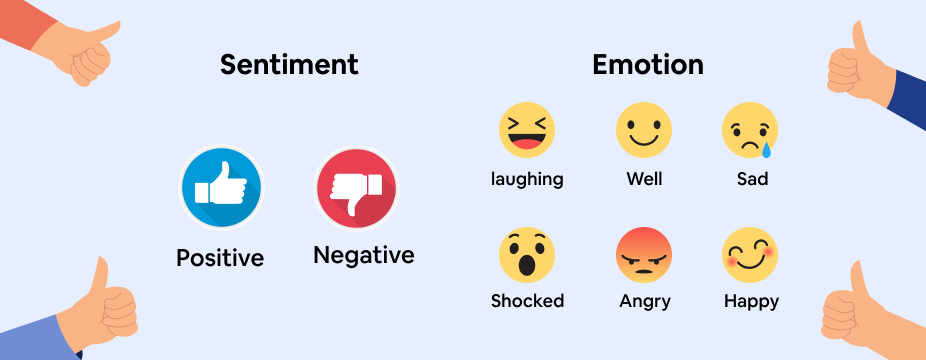

Одна из самых известных классификаций содержит 6 эмоций: счастье (happiness), печаль (sadness), страх (fear), гнев (anger), отвращение (disgust), удивление (surprise). Утверждается, что люди всех культур испытывают их и могут распознавать в других людях. Для каждой базовой эмоции есть соответствующее, безошибочно опознаваемое выражение лица.

[Ekman P. (1999) Basic emotions.](https://www.paulekman.com/wp-content/uploads/2013/07/Basic-Emotions.pdf)

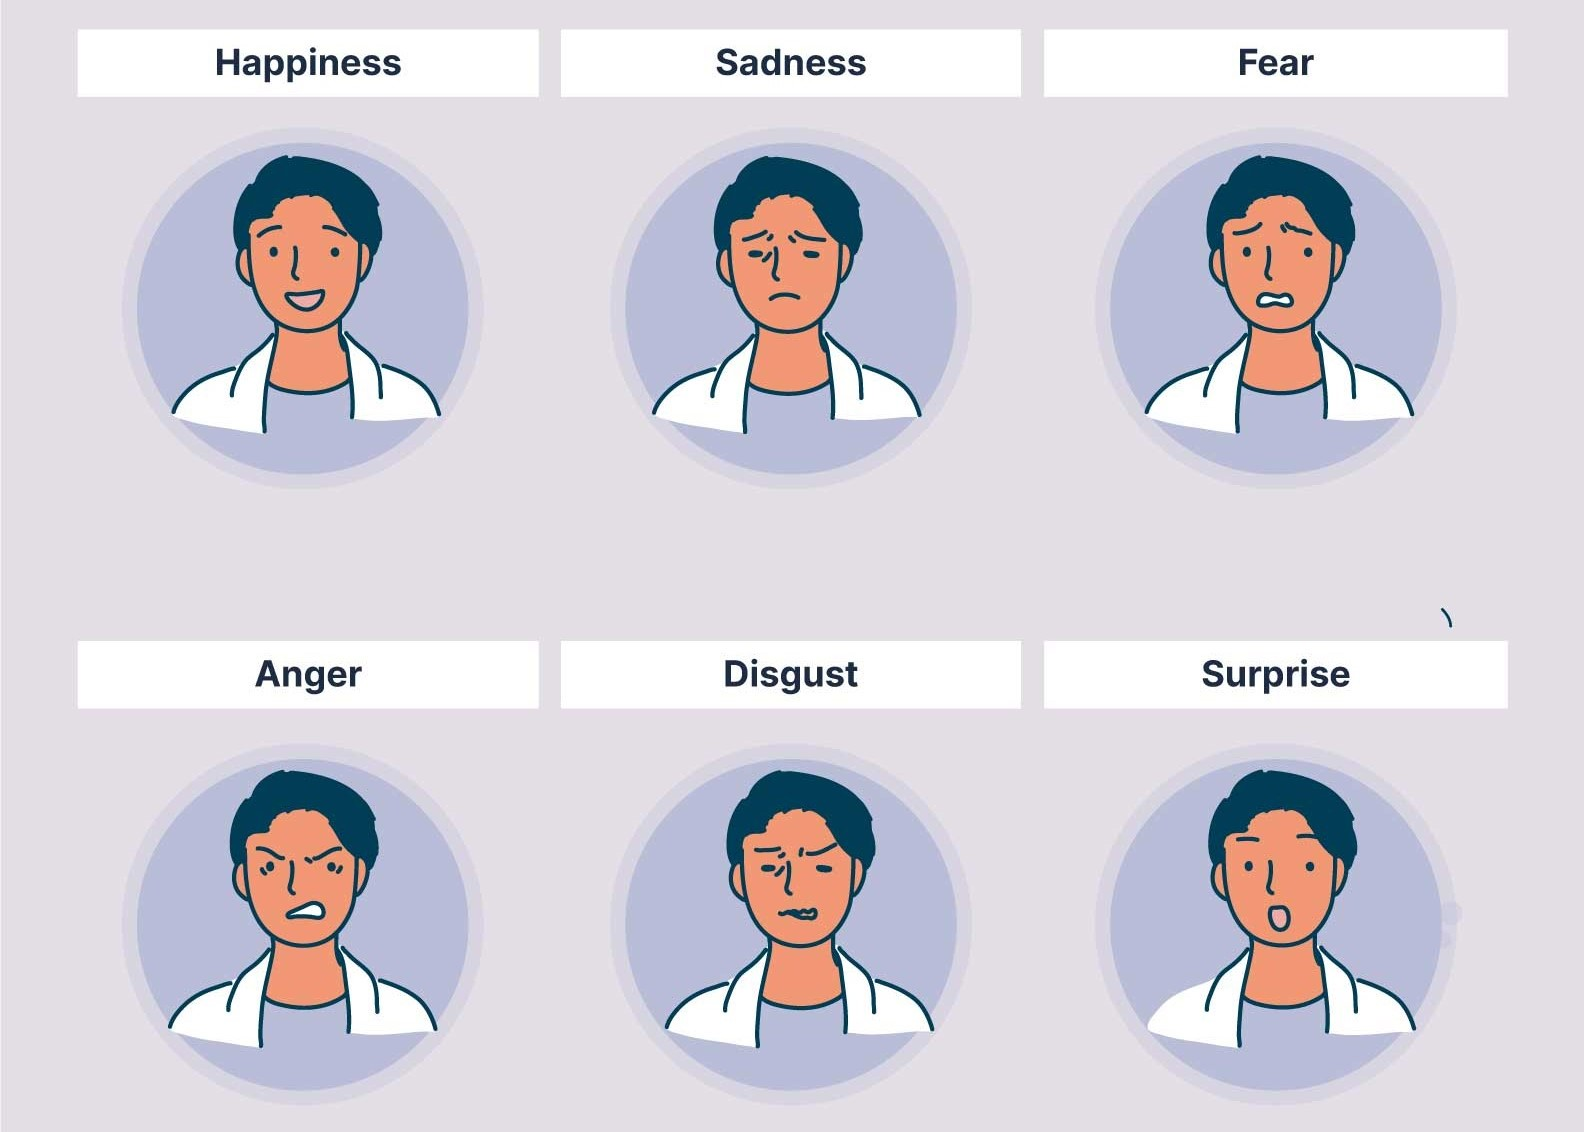

Другая классификация опирается на так называемое колесо эмоций (wheel of emotion). Оно состоит из восьми основных эмоций в четырех противоположных парах: радость (joy) – печаль (sadness), гнев (anger) – страх (fear), доверие (trust) – отвращение (disgust), предвкушение (anticipation) – удивление (surprise), и производных эмоций. Чем дальше от центра, тем менее интенсивным является переживание. На внешнем круге обозначены состояния, в которые попадает человек при столкновении двух эмоций.

[Plutchik R. (1980) A general psychoevolutionary theory of emotion.](https://www.sciencedirect.com/science/article/abs/pii/B9780125587013500077)

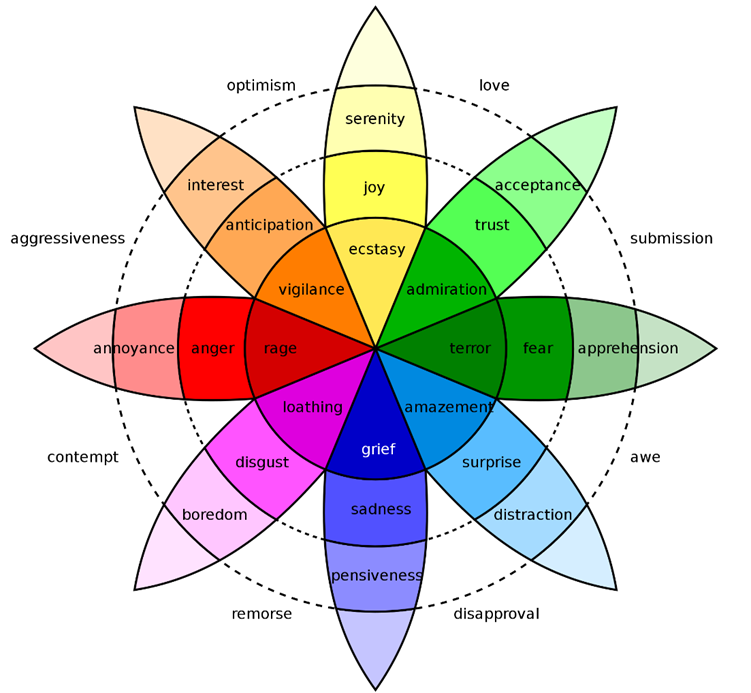

В качестве примера рассмотрим [модель EmoNet](https://github.com/UBC-NLP/EmoNet), обученную для классификации эмоций на основе англоязычного датасета.
Данные размечены по 8 классам эмоций на среднем круге колеса Плутчика. Загрузим модель и применим её к предложению.

[Abdul-Mageed M. & Ungar L. (2017) Emonet: Fine-grained emotion detection with gated recurrent neural networks.](https://aclanthology.org/P17-1067/)


In [ ]:
!pip install git+https://github.com/UBC-NLP/EmoNet.git -q

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done


In [ ]:
from emonet import EmoNet

em = EmoNet()

/usr/local/lib/python3.10/dist-packages/emonet/emonet.py:174: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.__word2indx = torch.load(
/usr/local/lib/python3.10/dist-pac

In [ ]:
prediction = em.predict(text='Spectacular day in Brisbane today. Perfect for sitting in the sun and thinking up big ideas and resetting plans.', with_dist=True)
prediction

[('joy',
  0.8978073,
  {'anger': 0.0008576517,
   'anticipation': 0.06090205,
   'disgust': 0.0006827099,
   'fear': 0.007252514,
   'joy': 0.8978073,
   'sadness': 0.004249889,
   'surprise': 0.025819492,
   'trust': 0.0024283426})]

📌 Поменяйте значение параметра `with_dist` на **True**. Что изменилось и как можно интерпретировать получившийся вывод? Попробуйте определить эмоцию для других предложений.

## Задача классификации

Распознавание эмоций относится к задаче **классификации**, в более общем смысле — машинного обучения **с учителем**.
- Имеются объекты (тексты) и ответы (классы эмоций), которые нужно предсказать.
- Множество допустимых ответов конечно и известно заранее.
- Требуется построить алгоритм, принимающий описание объекта и выдающий ответ.

Имеющиеся данные разделяются на **обучающую** и **тестовую** выборку.
- Обучающая выборка — это примеры, на основе которых алгоритм ищет зависимость ответов от описаний объектов и строит общую закономерность.
- Тестовая выборка используется для оценки качества алгоритма на новых данных.

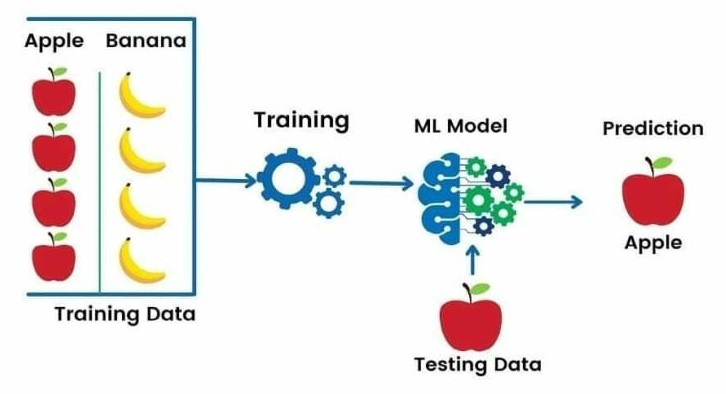

### Оценка качества

Для оценки качества классификации используется матрица ошибок.

Есть алгоритм, предсказывающий принадлежность каждого объекта одному из классов.
- $\hat y$ — предсказанный алгоритмом класс объекта
- $y$ — истинный класс объекта

Два класса делятся на положительный (1) и отрицательный (0 или –1).
- Объекты, которые алгоритм относит к положительному классу, – положительные (Positive).
- Те, которые на самом деле принадлежат к этому классу, – истинно положительные (True Positive).
- Остальные – ложно положительные (False Positive).

Аналогичная терминология для отрицательного (Negative) класса.

Таким образом, ошибки классификации бывают двух видов: False Negative (FN) и False Positive (FP).

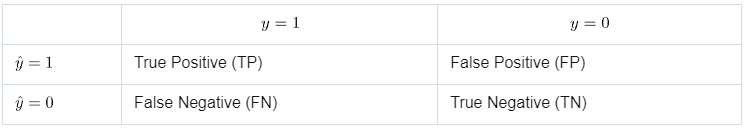

Матрица ошибок используется для подсчета метрик качества классификации.

Accuracy — доля правильных ответов алгоритма среди всех ответов (непоказательна в задачах с неравными классами):

$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

Точность — доля объектов, названных классификатором положительными и при этом действительно являющимися положительными.

$$Precision = \frac{TP}{TP + FP}$$

Полнота — доля объектов положительного класса, которые нашел алгоритм, из всех объектов положительного класса.

$$Recall = \frac{TP}{TP + FN}$$

F-мера — среднее гармоническое точности и полноты:

$$F{\text -}score=2\frac{Precision×Recall}{Precision+Recall}$$
​
Данная формула придает одинаковый вес точности и полноте, поэтому F-мера будет падать одинаково при уменьшении и точности и полноты. Можно рассчитать F-меру придав различный вес точности и полноте, если отдать приоритет одной из этих метрик при разработке алгоритма.

$$F{\text -}score=(β^2+1)\frac{Precision×Recall}{β^2Precision+Recall}$$
​
$β$ принимает значения в диапазоне, $0<β<1$ если нужно отдать приоритет точности, а при $β>1$ приоритет отдается полноте. При $β=1$ формула сводится к предыдущей, что дает сбалансированную F-меру (также ее называют F1).

В многоклассовых задачах подсчет качества сводится к вычислению одной из двухклассовых метрик.

Пусть выборка состоит из  $K$  классов. Задача классификации ставится как $K$  задач об отделении класса  $i$  от остальных $(i=1,...,K)$. Для каждой из них можно посчитать свою матрицу ошибок.

Выделяют три подхода:

1. Микроусреднение

Сначала элементы матрицы ошибок усредняются по всем классам. Например $TP = \frac{1}{K}\sum_{i=1}^KTP_i$. Затем по одной усреднённой матрице ошибок считаем точность, полноту, F-меру.

 $$Micro{\text -}precision = \frac{\sum_{i=1}^KTP_i}{\sum_{i=1}^KTP_i+\sum_{i=1}^KFP_i}$$

 $$Micro{\text -}recall = \frac{\sum_{i=1}^KTP_i}{\sum_{i=1}^KTP_i+\sum_{i=1}^KFN_i}$$

2. Макрусреднение

Сначала вычисляется итоговая метрика для каждого класса, а затем результаты усредняются по всем классам.

$$Macro{\text -}precision = \frac{\sum_{i=1}^KPrecision_i}{K}$$

$$Macro{\text -}recall = \frac{\sum_{i=1}^KRecall_i}{K}$$

3. Взвешивание

Метрики для каждого класса умножаются на его вес, а затем складываются.

$$Weighted{\text -}precision = \sum_{i=1}^K{w_i*Precision_i}$$

$$Weighted{\text -}recall = \sum_{i=1}^K{w_i*Recall_i}$$

$$w_i = \frac{количество \; объектов\; класса\; i}{общее \; количество \; объектов}$$

### Библиотека scikit-learn

Для классификации будем использовать готовые методы из библиотеки [scikit-learn](https://scikit-learn.org/stable/) для машинного обучения.

 У них стандартные функции:
 - `fit` обучает модель на обучающей выборке
 - `predict` предсказывает классы на тестовой выборке

Составление матрицы ошибок и подсчет всех метрик также может осуществляться инструментами sklearn.
- [матрица ошибок](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
- [точность](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)
- [полнота](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)
- [F-мера](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

Чтобы не считать все метрики по отдельности, можно сразу получить [отчет о классификации](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html):
- метрики для каждого класса
  - точность (precision)
  - полнота (recall)
  - F-мера (f1-score)
  - количество объектов каждого класса (support)
- усредненные метрики
  - микроусредненные (micro avg)
  - макроусредненные (macro avg)
  - взвешенные (weighted avg)
  
Если микроусредненные точность, полнота и F-мера равны, выводится одно значение, равное также accuracy.

## Emotion Classification in Russian: Feature Engineering and Analysis

Мы рассмотрим подробно несколько русскоязычных наборов данных для распознавания эмоций.

Первый из них создан студентами и сотрудниками ФиПЛа НИУ ВШЭ в Нижнем Новгороде и представлен в следующей статье:

[Kazyulina M., Babii A. & Malafeev A. (2021) Emotion classification in Russian: feature engineering and analysis.](https://github.com/Xeanst/compling_tasks/blob/main/1_multiclass_emotion_detection/Emotion%20Classification%20in%20Russian_Feature%20Engineering%20and%20Analysis.pdf)

Датасет размечен по **6 классам эмоций**: радость (joy), печаль (sadness), злость (anger), неуверенность (uncertainty), нейтральность (neutrality).

Из классификация Экмана (счастье, удивление, печаль, гнев, страх, отвращение) удалена категория отвращения из-за отсутствия соответствующих данных. Категории страха и удивления  объединены в одну категорию неопределенности из-за определенного сходства способов, которыми эти эмоции обычно выражаются.

📌 Зачем нужен нейтральный класс?

**Источник** текстов: сообщения пользователей Вконтакте и Телеграм. В среднем длина  составляет 4-5 слов, минимальная длина – 1 слово, максимальная – 9 слов.

Этапы **сбора** данных:
- собрано 1 800 000 сообщений на кириллице;
- адреса электронной почты и номера телефонов заменены  токенами `<email>` и `<phone>`;
- проведена лемматизация — процесс приведения словоформы к лемме, то есть её нормальной (словарной) форме.

В русском языке это следующие морфологические формы:

- для существительных — именительный падеж, единственное число
  - кошками → кошка;
- для прилагательных — именительный падеж, единственное число, мужской род
  - красивых → красивый;
- для глаголов, причастий, деепричастий — глагол в инфинитиве (неопределённой форме)
  - бежал → бежать.

В рассматриваемом наборе данных лемматизация проведена с помощью морфологического анализатора [RNNmorph](https://github.com/IlyaGusev/rnnmorph). Рассмотрим пример его применения.

In [ ]:
!pip install -q git+https://github.com/IlyaGusev/rnnmorph keras==2.8.0 tensorflow==2.8.0

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 16.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflic

In [ ]:
from rnnmorph.predictor import RNNMorphPredictor
predictor = RNNMorphPredictor(language="ru")

forms = predictor.predict(["мать", "поймала", "мышь"])
print(f'Часть речи слова "мать": {forms[0].pos}')
print(f'Лемма слова "поймала": {forms[1].normal_form}')
print(f'Морфологический анализ слова "мышь": {forms[2].tag}')

Часть речи слова "мать": NOUN
Лемма слова "поймала": поймать
Морфологический анализ слова "мышь": Case=Acc|Gender=Fem|Number=Sing


**Разметка** данных осуществлялась в полуавтоматическом режиме. Предложения разделены на две части: с эмодзи и без них.

Для предложений с эмодзи (11287 сообщений):
- эмодзи, которые встретились менее 40 раз, удалены из
 данных
- остальные эмодзи сгруппированы в 4 набора путем ручного анализа контекстов

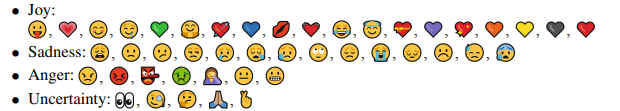

- исключены сообщения с нестандартным использованием эмодзи (ирония, сарказм)
- осталось 4500 предложений с эмодзи, использованными в прямом значении
- сообщения разделены на два набора: обучающий (2300) и валидационный (2200)
- обучены бинарные классификаторы для распознавания каждой эмоции (1 — ожидаемый класс, 0 — другие эмоции)

Для оставшихся предложений без эмодзи:
- разметка осуществлялась с помощью обученных классификаторов
- остались сообщения, для которых только один классификатор предсказал наличие эмоции

Нейтральный класс размечался вручную: такие сообщения явно не выражают эмоций и редко включают эмодзи.

Итоговый датасет содержит **110 000 сообщений** (от 19 000 до 24 000 примеров на каждый класс).

В статье используется три метода машинного обучения для распознавания эмоций на данном корпусе:
- логистическая регрессия
- наивный байесовский классификатор
- случайный лес

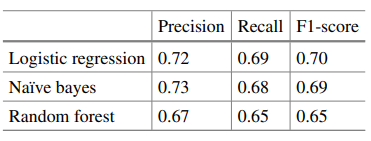

## Загрузка и обработка данных

Загрузим данные из [гитхаб-репозитория](https://github.com/asbabiy/AIST/tree/master) одного из авторов статьи. Доступна только половина датасета (50 000 предложений).

In [1]:
!wget -q https://raw.githubusercontent.com/Xeanst/compling_tasks/main/1_multiclass_emotion_detection/train_data.csv

Преобразуем датасет из формата csv (comma-separated values) в объект класса DataFrame библиотеки [Pandas](https://pandas.pydata.org/docs/).

In [2]:
import pandas as pd

df = pd.read_csv("train_data.csv")
df

,text,ton,analysis
0,а тот я завтра опять быть висеть,1.0,А то я завтра опять буду висеть
1,не надо я блин убивать,1.0,Не надо меня блин убивать
2,мы в дом сидеть,2.0,Мы в доме сидим
3,как енто перевести,3.0,как енто перевести
4,ща быть немецкий мат учить,0.0,ща будем немецкий мат учить
...,...,...,...
50745,интересно мы когда нибыть узнать кто это или нет,3.0,Интересно мы когда нибудь узнаем кто это или нет
50746,у я куча вкладка с география простой на завтра...,1.0,У меня куч вкладок с географией прост на завтр...
50747,и опять встать в 6,1.0,и опять встану в 6
50748,при выделение вроде чё тот не тот,3.0,При выделении вроде чё то не то


В датафрейме есть три столбца:
- text: лемматизированные предложения
- ton: метка класса
- analysis: исходные предложения

По текущей таблице невозможно понять, как соотносятся метки и названия классов. Однако решение есть: в статье представлены наиболее характерные слова  для каждой эмоции.

Они были определены с помощью критерия хи-квадрат. Он используется для выяснения, есть ли связь между двумя переменными, в данном случае — для выяснения, случайно ли появление слова в определенном классе. Если полученное значение хи-квадрата выше критического значения, нулевая гипотеза о независимости (класс документа не влияет на частотность слова) может быть отклонена.

Попробуем определить для некоторых слов из списка, в предложениях с какой меткой класса они встречаются чаще.

In [3]:
from collections import Counter

def word_counter(df, word):

  index = [] # список меток предложений, где встретилось слово
  for i in range(len(df)):
    if word in df["text"][i]:
      index.append(df["ton"][i]) # если слово есть в предложении, записываем метку

  word_counter = Counter(index) # подсчитываем частоту для каждой метки в списке
  return word_counter

Так выглядит список частотных слов для класса "радость": *молодец, ypa, солнышко, благодарить, обожать, любить, добрый, думать, удача, рад*.

📌 Примените функцию к первым двум словам. Как можно интерпретировать результат?

In [4]:
well_done = word_counter(df, "молодец") # Место для вашего кода
well_done

Counter({2.0: 5, 0.0: 9, 1.0: 1, 4.0: 1, 3.0: 1})

In [5]:
yay = word_counter(df, "ура") # Место для вашего кода
yay

Counter({3.0: 45, 4.0: 50, 0.0: 33, 1.0: 34, 2.0: 64})

Найдем ключ словаря с максимальным значением. Воспользуемся функцией `zip()`, которая создает список кортежей из ключа и значения.

In [6]:
list(zip(well_done.values(), well_done.keys()))

[(5, 2.0), (9, 0.0), (1, 1.0), (1, 4.0), (1, 3.0)]

In [7]:
max(zip(well_done.values(), well_done.keys()))

(9, 0.0)

In [8]:
max(zip(well_done.values(), well_done.keys()))[1]

0.0

Теперь мы можем найти, в предложениях с какими метками чаще встречалось каждое слово.

📌 Для каждого слова из списка считаем, в предложениях с какими индексами оно встречалось `word_counter()`, и находим максимальное значение `max()`
- Записываем результат
- Подсчитываем частоту для каждого индекса в списке

In [9]:
def label_counter(emotion_list):

  labels = []
  for word in emotion_list:
    max_index = max(zip(word_counter(df, word).values(), word_counter(df, word).keys()))[1] # Место для вашего кода
    labels.append(max_index)

  labels_counter = Counter(labels)
  return labels_counter

Запишем наиболее характерные слова для каждой эмоции и определим, каким меткам классов они соответствуют.

In [10]:
joy_list = ["молодец", "ура", "солнышко", "благодарить", "обожать", "любить", "добрый", "думать", "удача", "рад"]
joy = label_counter(joy_list)
print(f"Радость: {dict(joy)}")

sadness_list = ["скучать", "испортить", "никогда", "болеть", "грустный", "обидеться", "бедный", "жаль", "прощать", "плакать", "завидовать", "никто"]
sadness = label_counter(sadness_list)
print(f"Печаль: {dict(sadness)}")

anger_list = ["презирать", "вылететь", "ненавидеть", "жесть", "жирный", "стремный", "тупой", "фу", "ух"]
anger = label_counter(anger_list)
print(f"Злость: {dict(anger)}")

uncertainty_list = ["мб", "хм", "почему", "казаться", "сколько", "интересно", "разве", "ли", "вроде"]
uncertainty = label_counter(uncertainty_list)
print(f"Неуверенность: {dict(uncertainty)}")

neutrality_list = ["странный", "искренний", "уйти", "чисто", "география", "который", "знакомый", "дз", "подняться", "отличаться"]
neutrality = label_counter(neutrality_list)
print(f"Нейтральность: {dict(neutrality)}")

Радость: {0.0: 6, 2.0: 2, 3.0: 1, 4.0: 1}
Печаль: {1.0: 9, 2.0: 1, 4.0: 1, 0.0: 1}
Злость: {2.0: 7, 4.0: 1, 1.0: 1}
Неуверенность: {3.0: 9}
Нейтральность: {0.0: 1, 3.0: 1, 4.0: 7, 1.0: 1}


📌 Создайте словарь `ton2label`, где будет указано соответствие индексов (ключи) и эмоций (значения).

Добавим новый столбец датафрейма, где будет указано название эмоции.

In [11]:
ton2label = {0.0: "joy", 1.0: "sadness", 2.0: "anger", 3.0: "uncertainty", 4.0: "neutrality"} # Место для вашего кода
df['label'] = df["ton"].map(ton2label)
df

,text,ton,analysis,label
0,а тот я завтра опять быть висеть,1.0,А то я завтра опять буду висеть,sadness
1,не надо я блин убивать,1.0,Не надо меня блин убивать,sadness
2,мы в дом сидеть,2.0,Мы в доме сидим,anger
3,как енто перевести,3.0,как енто перевести,uncertainty
4,ща быть немецкий мат учить,0.0,ща будем немецкий мат учить,joy
...,...,...,...,...
50745,интересно мы когда нибыть узнать кто это или нет,3.0,Интересно мы когда нибудь узнаем кто это или нет,uncertainty
50746,у я куча вкладка с география простой на завтра...,1.0,У меня куч вкладок с географией прост на завтр...,sadness
50747,и опять встать в 6,1.0,и опять встану в 6,sadness
50748,при выделение вроде чё тот не тот,3.0,При выделении вроде чё то не то,uncertainty


Определим количество текстов для каждого эмоционального класса.

In [12]:
df.label.value_counts()

,count
label,
neutrality,10749
uncertainty,10673
anger,10616
joy,9379
sadness,9333


📌 Запишем в отдельные переменные тексты `X` и метки классов `y`. Выведем их размер `.shape()`

In [13]:
# Место для вашего кода
X, y = df["text"], df["ton"]
X.shape, y.shape

((50750,), (50750,))

Разделим данные на обучающую и тестовую выборку.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape, X_test.shape

((38062,), (12688,))

## Векторизация текста

Каждый объект имеет некоторую числовую характеристику — признак. Совокупность всех признаков объекта называется его **признаковым описанием** и представляется в виде вектора.

Если объектом является текст, в качестве признаков выступают слова, которые он содержит. Процесс преобразования текста в числа называется **векторизацией**.

### Мешок слов

«Мешок слов» (bag of words) — представление текста, которое описывает вхождение слова в документ.

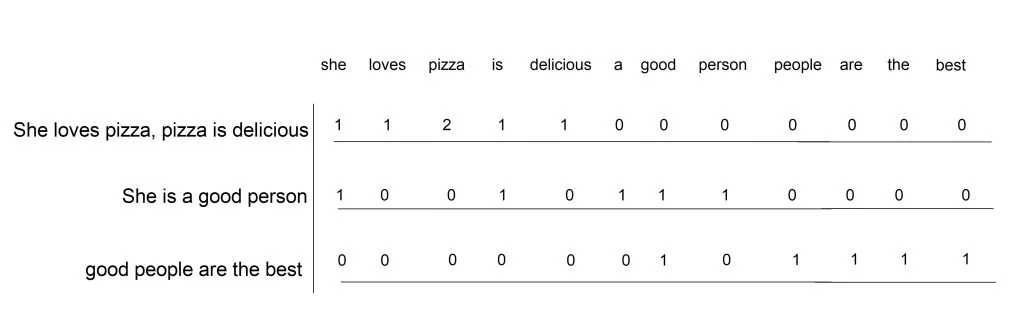

Реализуем векторизацию мешком слов с помощью метода [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Метод `fit` собирает словарь, метод `transform` преобразует тексты в векторы на основе собранного словаря. Метод `fit_transform` выполняет все это сразу.

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

bow = CountVectorizer()
X_train_bow = bow.fit_transform(X_train)
X_test_bow = bow.transform(X_test)
X_train_bow, X_test_bow

(<38062x15242 sparse matrix of type '<class 'numpy.int64'>'
 	with 143122 stored elements in Compressed Sparse Row format>,
 <12688x15242 sparse matrix of type '<class 'numpy.int64'>'
 	with 44725 stored elements in Compressed Sparse Row format>)

### TF-IDF

$TF{\text -}IDF$ ($TF$ — term frequency, $IDF$ — inverse document frequency)  — это способ векторизации текста, отражающий важность слова в документе, а не только частоту его появления.

Частота слов ($TF$) — это мера частоты употребления слова $w$ в документе $d$. $TF$ определяется как отношение появления слова в документе к общему количеству слов в документе.

$$TF(w,d) = \frac{количество\:вхождений\:слова\:w\:в\:документе\:d}{общее\:количество\:слов\:n\:в\:документе\:d}$$

Обратная частота документов ($IDF$) —  это мера важности слова. Некоторые слова могут присутствовать наиболее часто, но не имеют большого значения. $IDF$ присваивает вес каждому слову в зависимости от его частоты в корпусе $D$.

$$IDF(w,D) = ln(\frac{общее\:количество\:документов\:N\:в\:корпусе\:D}{количество\:документов,\:содержащих\:слово\:w})$$

$TF{\text -}IDF$ является произведением $TF$ и $IDF$.
$$TF{\text -}IDF(w,d,D)=TF(w,d)*IDF(w,D)$$

Для векторизации воспользуемся методом [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html).
- Создадим векторизатор `tf_idf` — объект класса `TfidfVectorizer()`

📌 Применим метод `fit_transform` к текстам обучающей выборки и метод `transform` к текстам тестовой выборки
- Посмотрим на результат

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer()
X_train_tf_idf = tf_idf.fit_transform(X_train) # Место для вашего кода
X_test_tf_idf = tf_idf.transform(X_test) # Место для вашего кода
X_train_tf_idf, X_test_tf_idf

(<38062x15242 sparse matrix of type '<class 'numpy.float64'>'
 	with 143122 stored elements in Compressed Sparse Row format>,
 <12688x15242 sparse matrix of type '<class 'numpy.float64'>'
 	with 44725 stored elements in Compressed Sparse Row format>)

Разреженная (sparse) матрица — матрица с преимущественно нулевыми элементами.

Если бо́льшая часть элементов матрицы ненулевая, она считается плотной (dense).

In [17]:
df2 = pd.DataFrame(X_train_tf_idf.todense(), columns = tf_idf.get_feature_names_out())
df2.index = X_train
df2.iloc[:, 1650:1660].head(3)

,вессёл,вест,вести,весь,весёлый,ветвь,ветер,ветеран,ветеринар,ветерок
text,,,,,,,,,,
че ты как долго по метро кататься,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
он по 4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
весь хороший дорога,0.0,0.0,0.0,0.350174,0.0,0.0,0.0,0.0,0.0,0.0


Многие слова встречаются по одному разу и не помогут для классификации. Можно ограничить размер словаря и включать только слова, которые встречаются не реже 5 раз (`min_df=5`). Также можно убрать слова, которые встречаются слишком часто и являются стоп-словами в пределах данного корпуса: например, при исключаем токены, которые встретились в больше чем 50% документов (`max_df=0.5`).

In [18]:
tf_idf = TfidfVectorizer(min_df=5, max_df=0.5)
X_train_tf_idf = tf_idf.fit_transform(X_train)
X_test_tf_idf = tf_idf.transform(X_test)
X_train_tf_idf, X_test_tf_idf

(<38062x2582 sparse matrix of type '<class 'numpy.float64'>'
 	with 124736 stored elements in Compressed Sparse Row format>,
 <12688x2582 sparse matrix of type '<class 'numpy.float64'>'
 	with 41044 stored elements in Compressed Sparse Row format>)

## Наивный байесовский классификатор

[Наивный байесовский классификатор](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) принимает решение по вероятностям, рассчитаным на обучающем корпусе. При предсказании выбирается класс, набравший наибольшую оценку. Наивным такой классификатор называется, потому что делается предположение о независимости слов в документе друг от друга.

Для каждого класса $c$ требуется найти $P(c|d)$ — вероятность класса $c$ для документа $d$. Она рассчитывается по формуле Байеса:

$$P(c|d) = \frac{P(d|c) P(c)} {P(d)}$$

Среди значений $P(c|d)$ для всех классов выбирается $\hat c$, набравший наибольшую оценку.

$$\hat c = \underset{c \in C }{\operatorname{argmax}} P(c|d) = \underset{c \in C }{\operatorname{argmax}} \frac{P(d|c)P(c)} {P(d)}$$

Значение в знаменателе одинаково для всех классов, поэтому его можно опустить.

$$\hat c = \underset{c \in C }{\operatorname{argmax}} P(d|c)P(c) $$

$P(c)$: вероятность класса $c$ — это доля документов класса $c$ среди всех документов.

$P(d|c)$: вероятность документа $d$ для класса $c$ зависит от слов $x_1, x_2, ..., x_n$, входящих в документ:

$$P(d|c) = P(x_1,x_2,...,x_n|c) = P(x_1|c)P(x_2|c)...P(x_n|c) $$

In [ ]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB() # создание модели
mnb.fit(X_train_tf_idf, y_train) # обучение
y_mnb = mnb.predict(X_test_tf_idf) # предсказание классов
print(y_mnb)

Результаты классификации можно отразить в виде матрицы ошибок.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Greens")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True emotion')
  plt.xlabel('Predicted emotion')

class_names = ['joy', 'sadness', 'anger', 'uncertainty', 'neutrality']
cm = confusion_matrix(y_test, y_mnb)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

Одна из метрик оценки качества классификации — точность.

In [ ]:
from sklearn.metrics import precision_score

print("Precision")
print(f"micro-average: {precision_score(y_test, y_mnb, average='micro').round(2)}")
print(f"macro-average: {precision_score(y_test, y_mnb, average='macro').round(2)}")
print(f"weighted: {precision_score(y_test, y_mnb, average='weighted').round(2)}")

📌 Посчитайте другие метрики — полноту и F-меру (три метода усреднения) и выведите получившиеся значения.

In [ ]:
from sklearn.metrics import recall_score

# Место для вашего кода

In [ ]:
from sklearn.metrics import f1_score

# Место для вашего кода

Метрики для каждого класса, а также усредненные метрики представлены в отчете о классификации.

In [ ]:
from sklearn.metrics import classification_report

target_names = ['joy', 'sadness', 'anger', 'uncertainty', 'neutrality']
print(classification_report(y_test, y_mnb, target_names=target_names))

## Логистическая регрессия

Общее назначение регрессии состоит в анализе связи между несколькими независимыми переменными и зависимой переменной. Зависимая переменная $z$ является взвешенной суммой независимых переменных $x_1,x_2,...,x_n$ (признаков). Веса $w_1, w_2, ..., w_n$ подбираются на обучающих данных — в этом и состоит обучение модели.

$$z(x) = w_1x_1 + w_2x_2 + ... + w_nx_n$$

Переменная $z$ может принимать значения в любом диапазоне. Чтобы получить вероятность отнесения объекта к классу, нужно привести его в диапазон от 0 до 1 с помощью функции активации.

### Функция активации

В случае бинарной классификации используется сигмоида. Если получившееся значение больше 0.5, то объект относится к положительному классу, иначе — к отрицательному.

$$ σ(z(x))=\frac{1}{1+e^{-z(x)}}$$

📌 Запишите формулу сигмоиды. Используйте `np.exp(x)` из библиотеки [numpy](https://numpy.org/doc/stable/index.html#) для подсчета $e^x$.

Чтобы задать диапазон возможных значений, используется метод `np.arange()`.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

z = np.arange(-10, 10, 0.5)
σ = # Место для вашего кода
plt.plot(z, σ)
plt.xlabel("z(x)")
plt.ylabel("σ(z(x))")

plt.show()

📌 Можно ли использовать сигмоиду для многоклассовой классификации?

Для многоклассовой классификации используется функция активации softmax.  Вероятность $i$-го класса при наличии $K$ классов рассчитывается следующим образом:

$$\text{softmax}(z_{i}) = \frac{e^{z_i}}{\sum_{j=1}^K e^{z_j}}$$
$$i=1,...,K$$

Для каждого объекта выбирается класс с наибольшей вероятностью.

📌 Запишите формулу для функции софтмакс. Для подсчета суммы используйте метод `np.sum()`.

In [ ]:
def softmax(z):
    return # Место для вашего кода

z = np.array([2.6, 3.2, 0.5])

print(softmax(z))
print(f"softmax(z_0) = {softmax(z)[0].round(2)}")
print(f"softmax(z_1) = {softmax(z)[1].round(2)}")
print(f"softmax(z_2) = {softmax(z)[2].round(2)}")
print(f"sum = {softmax(z)[0] + softmax(z)[1] + softmax(z)[2]}")

### Функция потерь

Необходимо определить оптимальные параметры $w_1,...,w_n$, при которых различие между предсказанными и истинными значениями будет минимально. Рассчитать величину ошибки позволяет **функция потерь**, которую необходимо минимизировать.

Используется функция кросс-энтропии ($L_{CE}$ — *Cross Entropy Loss*):

$$L_{CE}(\hat y,y) = -\sum^{K}_{i=1}y_i \cdot log(\hat y_i),$$

где $i$ — номер класса, $y$ — истинный ответ, $\hat y$ — предсказанный ответ.

В случае бинарной классификации имеет $K=2$, $y=0$ или $y=1$ ($L_{BCE}$ — *Binary Cross Entropy Loss*):

$$L_{BCE}(\hat y,y) = -(y \cdot log(\hat y)+(1-y) \cdot log(1-\hat y))$$

В случае многоклассовой классификации $K>2$. Истинный ответ $y$ — вектор длины $K$, где элемент вектора $y_c=1$, если $c$ — истинный класс, остальные элементы равны $0$.

Например, $K=3$ (классы $0,1,2$). Объект относится к классу $2$. Тогда $y = (0, 0, 1)$, $c=2$, $y_2 = 1$.

Модель предсказывает вектор $\hat y$ длины $K$. Функция кросс-энтропии имеет вид:

$$L_{CE}(\hat y,y) = -\log \hat y_c$$

### Применение

Сначала попробуем обучить модель [логистической регрессии](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) с дефолными параметрами.

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg_1 = LogisticRegression(random_state=0) # создание модели
logreg_1.fit(X_train_tf_idf, y_train) # обучение
y_logreg_1 = logreg_1.predict(X_test_tf_idf) # предсказание классов
print(y_logreg_1)

Модель обучилась предсказывать метки классов. Однако при обучении возникло некоторое предупреждение.

`lbfgs` расшифровывается как [Алгоритм Бройдена — Флетчера — Гольдфарба — Шанно с ограниченным использованием памяти](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%91%D1%80%D0%BE%D0%B9%D0%B4%D0%B5%D0%BD%D0%B0_%E2%80%94_%D0%A4%D0%BB%D0%B5%D1%82%D1%87%D0%B5%D1%80%D0%B0_%E2%80%94_%D0%93%D0%BE%D0%BB%D1%8C%D0%B4%D1%84%D0%B0%D1%80%D0%B1%D0%B0_%E2%80%94_%D0%A8%D0%B0%D0%BD%D0%BD%D0%BE) (Limited-memory Broyden–Fletcher–Goldfarb–Shanno Algorithm).  В документации логистической регрессии указано, что он используется для оптимизации весов (параметр `solver`) по умолчанию (`default`).

Данное предупреждение обозначает, что алгоритм оптимизации не сходится. Оно возникает в том случае, если ошибка заметно меняется между итерациями. Попробуем проигнорировать предупреждение и оценить результат классификации.

In [ ]:
from sklearn.metrics import classification_report
target_names = ['joy', 'sadness', 'anger', 'uncertainty', 'neutrality']
print(classification_report(y_test, y_logreg_1, target_names=target_names))

Избавиться от предупреждения можно двумя способами:

1. Использовать другой алгоритм оптимизации (параметр `solver`), который подходит для многоклассовой классификации.
2. Увеличить дефолтное количество итераций (`max_iter=100`) в несколько раз.

📌 Используйте один из способов добиться сходимости алгоритма оптимизации для обучения новой модели (`logreg_2`). Протестируйте модель и выведите отчет о классификации.


In [ ]:
# Место для вашего кода

### Коэффициенты регрессии

Для каждого класса были посчитаны свои коэффициенты регрессии. Они представляют матрицу $K \times n$, где $K$ — количество классов, $n$ — количество признаков (слов).

In [ ]:
coefficient_matrix = logreg_2.coef_
print(coefficient_matrix)
print(coefficient_matrix.shape)

 Каждый из коэффициентов регрессии описывает размер вклада соответствующего признака.
 - Положительный коэффициент — признак повышает вероятность принадлежности к классу, отрицательный коэффициент — признак уменьшает вероятность.
 - Большой коэффициент — признак существенно влияет на вероятность принадлежности к классу, почти нулевой коэффициент — признак имеет небольшое влияние на вероятность результата.

Выведем признаки с самыми большими коэффициентами для каждого класса и получим наиболее характерные слова для каждой эмоции.
- Необходимо определить порядок, в котором должны быть записаны коэффициенты и слова по возрастанию. Это можно сделать с помощью метода `.argsort()`.

In [ ]:
order = coefficient_matrix[0].argsort()
order

- В этом порядке нужно сортировать коэффициенты `coefficient_matrix[0]` и слова `tf_idf.get_feature_names_out()`. Чтобы получить порядок по убыванию, нужно развернуть массивы.

In [ ]:
coefficient_matrix[0][order][::-1]

In [ ]:
tf_idf.get_feature_names_out()[order][::-1]

Выполним то же самое в цикле, проходя по коэффициентам каждого класса.
- Создаем список признаков-слов
- Выводим название класса

📌 Записываем индексы в порядке возрастания коэффициентов (`order`)

📌 Сортируем коэффициенты (`class_coefficients`) и слова (`feature_names`), переворачиваем массив и записываем топ-5 значений

- Выводим слова и коэффициенты

In [ ]:
labels = ['Радость', 'Печаль', 'Злость', 'Неуверенность', 'Нейтральность'] # названия классов

for i in range(coefficient_matrix.shape[0]):

    feature_names = tf_idf.get_feature_names_out() # список признаков-слов
    print(f"\n{labels[i]}:")

    order = # Место для вашего кода
    class_coefficients = # Место для вашего кода
    feature_names = # Место для вашего кода

    for feature, coefficient in zip(feature_names, class_coefficients):
      print(feature, coefficient)

## Деревья решений

[Дерево решений](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) представляет собой иерархическую древовидную структуру, состоящую из правила вида «Если ..., то ...». За счет обучающего множества правила генерируются автоматически в процессе обучения.

Деревья решений включают в себя элементы двух типов — узлы (node) и листья (leaf). Узлы включают в себя решающие правила и производят проверку примеров на соответствие правилу. Примеры попадают в узел и разбиваются на два подмножества:
- удовлетворяют установленному правилу
- не удовлетворяют установленному правилу

Далее к каждому подмножеству применяется новое правило. Последний узел, когда не осуществляется проверка и разбиение, становится листом. Лист определяет класс для каждого попавшего в него примера. Пример попадает в лист, если соответствует всем правилам на пути к нему.

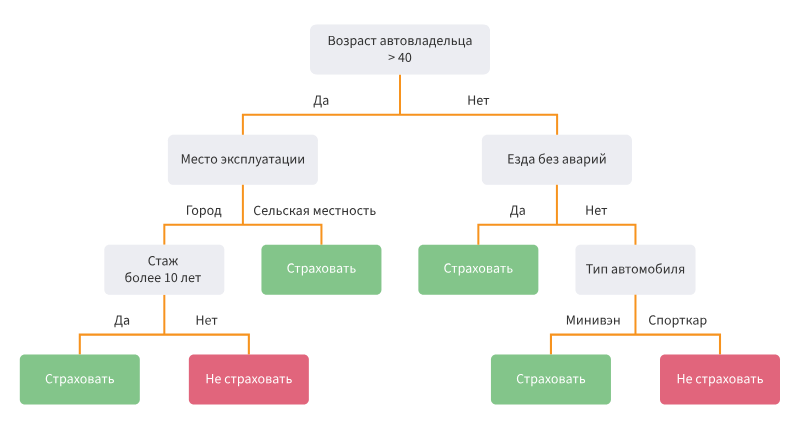

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

dec_tree = DecisionTreeClassifier(random_state=0)
dec_tree.fit(X_train_tf_idf, y_train)
y_dec_tree = dec_tree.predict(X_test_tf_idf)
target_names = ['joy', 'sadness', 'anger', 'uncertainty', 'neutrality']
print(classification_report(y_test, y_dec_tree, target_names=target_names))

Плюсом деревьев решений является их интерпретируемость — для каждого предсказания можно вывести цепочку условий, которая привела к такому выводу.

In [ ]:
from sklearn.tree import export_text

text_representation = export_text(dec_tree,
                                  class_names=target_names,
                                  feature_names=list(tf_idf.get_feature_names_out()))
print(text_representation)

## Метод случайного леса

[Метод случайного леса](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) — алгоритм машинного обучения, заключающийся в использовании ансамбля решающих деревьев. Каждое дерево строится на случайном подмножестве обучающих данных и случайном подмножестве признаков. В результате каждое дерево в ансамбле получается немного разным, что позволяет уменьшить эффект переобучения и повысить качество предсказаний.

Для построения каждого дерева случайного леса происходит следующее:
1. Случайным образом выбирается подмножество обучающих объектов из всего набора данных.
2. Случайным образом выбирается подмножество признаков. Это позволяет уменьшить корреляцию между деревьями в ансамбле и улучшить их разнообразие.
3. Строится дерево решений на выбранном подмножестве данных и признаков.

После построения всех деревьев в ансамбле для каждого объекта данных происходит голосование по всем деревьям. Наиболее популярный класс становится предсказанным классом.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rfc_1 = RandomForestClassifier(random_state=0)
rfc_1.fit(X_train_tf_idf, y_train)
y_rfc_1 = rfc_1.predict(X_test_tf_idf)
target_names = ['joy', 'sadness', 'anger', 'uncertainty', 'neutrality']
print(classification_report(y_test, y_rfc_1, target_names=target_names))

При использовании метода случайного леса можно настраивать различные параметры, например:
- `n_estimators` — количество деревьев в ансамбле
- `min_samples_split` — минимальное число объектов в узле, при котором возможно разделение
- `min_samples_leaf`— минимальное число объектов в листе

Для автоматического подбора параметров можно использовать модуль [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Он создает модель для каждой возможной комбинации параметров. Однако перебор всех параметров займет слишком много времени. Поэтому можно начать с алгоритма [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html). Он создает модели со случайными комбинациями параметров, что позволяет поверхностно исследовать широкие диапазоны значений.

! Код в ячейках с GridSearchCV и RandomizedSearchCV выполняется 10-15 минут.

### RandomizedSearchCV

Создаем сущность `param_dist`, содержащую диапазон значений каждого параметра. Далее инициализируем объект `rs` с помощью функции `RandomizedSearchCV()`, передавая ей модель случайного леса и `param_dist`. По умолчанию количество итераций равно 10 (`n_iter`), то есть будут сравниваться 10 разных моделей. Установим количество кросс-валидаций (`cv=3`).

Кросс-валидация — перекрестная проверка.

1. Фиксируется целое число $k$, меньшее числа примеров в датасете.
2. Датасет разбивается на $k$ одинаковых частей.
3. Происходит $k$ итераций, в каждой из которых одна часть выступает в роли тестового множества, а объединение остальных — в роли тренировочного.
4. Финальный результат модели получается либо усреднением получившихся тестовых результатов, либо измеряется на отложенном тестовом множестве, не участвовавшем в кросс-валидации.

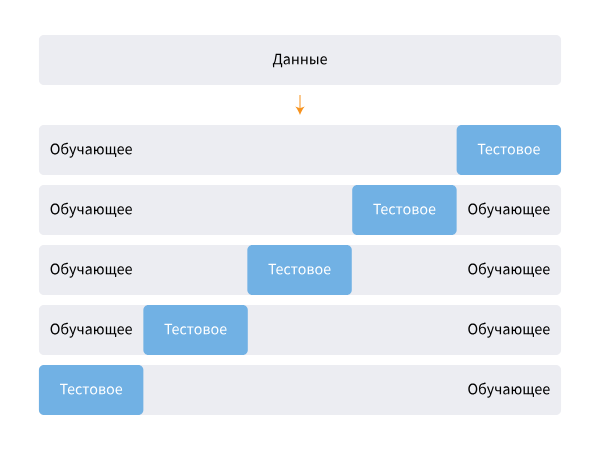

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {'n_estimators': np.arange(100, 1000, 100),
               'min_samples_split': np.arange(2, 30, 3),
               'min_samples_leaf': np.arange(1, 10, 3)}

rfc_2 = RandomForestClassifier()
rs = RandomizedSearchCV(rfc_2,
                        param_dist,
                        cv = 3,
                        random_state=0)

rs.fit(X_train_tf_idf, y_train)
rs.best_params_

{'n_estimators': 700, 'min_samples_split': 5, 'min_samples_leaf': 1}

При значениях параметров `n_iter = 10` и `cv = 3` мы создали 30 RF-моделей, случайно выбирая комбинации представленных параметров. Можем обратиться к атрибуту `best_params_` для получения сведений о наборе параметров, позволяющем создать лучшую модель. Но на данной стадии это может не очень показательно.

Чтобы выяснить, в каком диапазоне значений стоит продолжать поиск, создадим датафрейм `rs_df`, содержащий результаты работы алгоритма `RandomizedSearchCV`.

In [ ]:
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time',
            'std_fit_time',
            'mean_score_time',
            'std_score_time',
            'params',
            'split0_test_score',
            'split1_test_score',
            'split2_test_score',
            'std_test_score'],
            axis=1)
rs_df

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,mean_test_score,rank_test_score
0,700,5,1,0.827229,1
1,200,23,1,0.825469,2
2,100,20,4,0.786690,3
3,100,17,4,0.785403,4
4,100,23,4,0.784168,5
5,500,26,7,0.779991,6
6,200,26,7,0.778152,7
7,100,2,7,0.776549,8
8,100,8,7,0.775629,9
9,100,5,7,0.775498,10


Теперь создадим столбчатые диаграммы, на которых по оси Х расположены значения параметров, а по оси Y — средние значения, показываемые моделями. Это позволит понять, какие значения параметров лучше всего себя показывают.

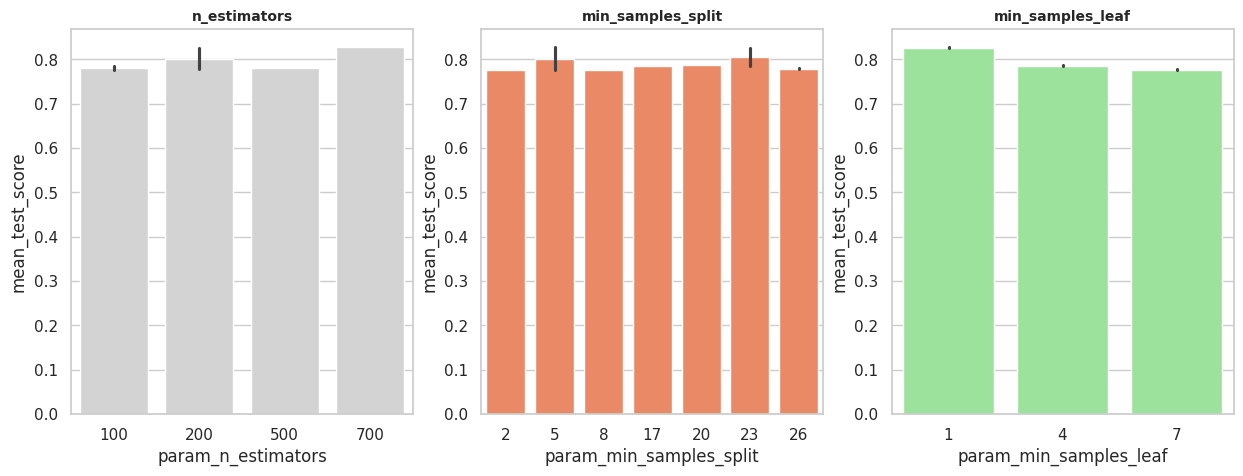

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(ncols=3, nrows=1)
sns.set(style="whitegrid", color_codes=True)
fig.set_size_inches(15,5)

sns.barplot(x='param_n_estimators', y='mean_test_score', data=rs_df, ax=axs[0], color='lightgrey')
axs[0].set_title(label = 'n_estimators', size=10, weight='bold')

sns.barplot(x='param_min_samples_split', y='mean_test_score', data=rs_df, ax=axs[1], color='coral')
axs[1].set_title(label = 'min_samples_split', size=10, weight='bold')

sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=rs_df, ax=axs[2], color='lightgreen')
axs[2].set_title(label = 'min_samples_leaf', size=10, weight='bold')

plt.show()

Если проанализировать графики, можно заметить, что лучшие результаты показывают следующие значения:
- `n_estimators`: 200 и 700
- `min_samples_split`: 5 и 23
- `min_samples_leaf`: 1 (значение по умолчанию)

### GridSearchCV

После применения алгоритма `RandomizedSearchCV` воспользуемся алгоритмом `GridSearchCV` для проведения более точного поиска наилучшей комбинации параметров.

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [200, 700],
               'min_samples_split': [5, 23]}
rfc_2 = RandomForestClassifier()
gs = GridSearchCV(rfc_2,
                  param_grid,
                  cv = 3)
gs.fit(X_train_tf_idf, y_train)
gs.best_params_

{'min_samples_split': 23, 'n_estimators': 200}

Теперь можем обратиться к атрибуту `best_params_`, чтобы узнать, какие значения параметров показывают наилучший результат.

📌 Создайте модель случайного леса с параметрами, которые оказались наилучшими в соответствии с алгоритмом `GridSearchCV`. Протестируйте модель и выведите отчет о классификации.

In [ ]:
# Место для вашего кода

## Итоговые результаты

Выведем метрики качества для всех обученных классификаторов.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

report = pd.DataFrame([
    {precision_score(y_test, preds, average='weighted'), recall_score(y_test, preds, average='weighted'), f1_score(y_test, preds, average='weighted')}
    for preds in [y_logreg_2, y_mnb, y_rfc_2]
]).round(2)
report = report.rename(columns={0: "precision", 1: "recall", 2: "f1_score"})
report = report.rename(index={0: 'Logistic regression', 1: 'Naïve bayes', 2: 'Random forest'})
report

📌 Сравните получившиеся результаты с результатами в исходной статье.